# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [14]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   102k      0 --:--:-- --:--:-- --:--:--  103k']

In [15]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [16]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data

# def read_data(file_name):
#     """
#     Read the dataset from the file.
#     Each instance has coordinates and a label (last column). A dummy input (-1) is added for the bias.
#     """
#     f = open(file_name, 'r')
#     data = []
#     # Discard header line
#     f.readline()
#     for instance in f.readlines():
#         if not re.search('\t', instance):
#             continue
#         # Convert the string values to integers and split by tab
#         instance = list(map(int, instance.strip().split('\t')))
#         # Add dummy input (-1) for bias term
#         instance = [-1] + instance
#         data.append(instance)
#     f.close()
#     return data


def dot_product(array1, array2):
    """
    Compute the dot product between two arrays.
    This is used in the perceptron for computing the weighted sum.
    """
    return sum(x * y for x, y in zip(array1, array2))


def sigmoid(x):
    """
    Compute the sigmoid function for input x.
    The sigmoid function is defined as 1 / (1 + exp(-x)).
    """
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weights, instance):
    """
    Compute the perceptron output.
    The output is the sigmoid applied to the dot product of weights and instance.
    """
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    """
    Predict the label for an instance.
    Return 1 if the model output is >= 0.5; otherwise, return 0.
    """
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.

"""
    Train the perceptron model using gradient descent.
    
    Parameters:
      instances: List of training examples.
      lr: Learning rate.
      epochs: Number of epochs.
      
    Returns:
      weights: The trained weight vector.
    
    The training process involves:
      1. Initializing the weight vector (including bias) to zeros.
      2. For each epoch, iterate over all training instances.
      3. Compute the weighted sum (dot product) for each instance.
      4. Apply the sigmoid function to obtain the output.
      5. Compute the error as the difference between the true label and output.
      6. Update each weight using the gradient (which includes the derivative of the sigmoid).
    """

def train_perceptron(instances, lr, epochs):
    # Step 1: Initialize weights (number of features excluding label)
    weights = [0] * (len(instances[0]) - 1)
    
    # Training loop over epochs
    for epoch in range(epochs):
        # Process each training instance
        for instance in instances:
            # Step 2: Compute the dot product of weights and instance inputs
            in_value = dot_product(weights, instance)
            # Step 3: Compute the output using the sigmoid function
            out = sigmoid(in_value)
            # Step 4: Compute the error (true label minus output)
            error = instance[-1] - out
            # Step 5: Update each weight using gradient descent
            for i in range(len(weights)):
                # Update rule: new_weight = old_weight + lr * error * derivative * input
                # The derivative of sigmoid is out * (1 - out)
                weights[i] += lr * error * out * (1 - out) * instance[i]
    return weights

## Run it

In [17]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.


### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
"""
The training loop uses the continuous output of the sigmoid function (i.e., a value between 0 and 1) because this output is differentiable. The gradient update rule for the perceptron relies on the derivative of the sigmoid (namely, output × (1 – output)) to adjust the weights correctly. If we used predict(weights, instance), the output would be thresholded to either 0 or 1, losing the nuance required for gradient descent. In short, using the raw sigmoid output allows for meaningful gradient computations, which are essential for the weight update step.
"""

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [18]:
# Read the datasets
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# Define hyperparameter arrays
tr_percent = [5, 10, 25, 50, 75, 100]  # Percentages of the training dataset
num_epochs = [5, 10, 20, 50, 100]        # Different numbers of epochs
lr_array = [0.005, 0.01, 0.05]           # Different learning rates

# Iterate over each combination and print the accuracy on the test dataset
for lr in lr_array:
    for tr_size in tr_percent:
        # Determine the number of training instances to use
        size = round(len(instances_tr) * tr_size / 100)
        pre_instances = instances_tr[:size]
        for epochs in num_epochs:
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(pre_instances):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr:  40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr:  40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learn

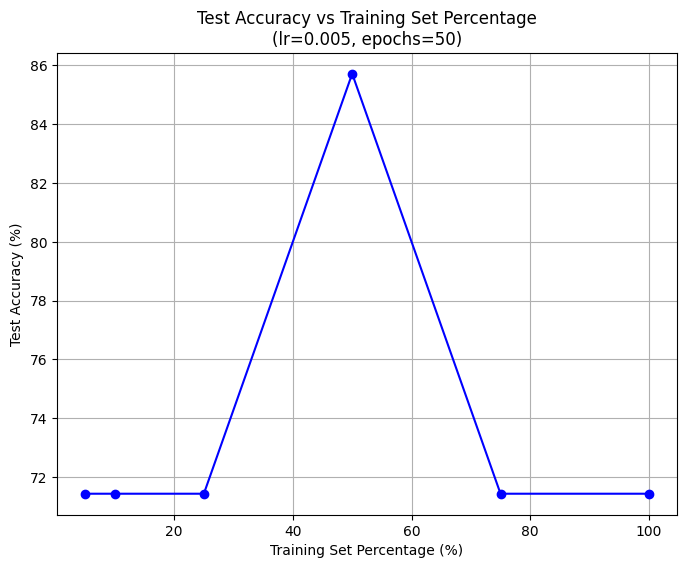

In [21]:
import matplotlib.pyplot as plt

# Plotting Test Accuracy vs. Training Set Percentage
# Fix hyperparameters for this plot: learning rate and number of epochs.
fixed_lr = 0.005
fixed_epochs = 50

# We'll vary the training set percentage (tr_percent) as defined earlier
accuracies = []
for tr_size in tr_percent:
    size = round(len(instances_tr) * tr_size / 100)
    pre_instances = instances_tr[:size]
    weights = train_perceptron(pre_instances, fixed_lr, fixed_epochs)
    accuracy = get_accuracy(weights, instances_te)
    accuracies.append(accuracy)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(tr_percent, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Training Set Percentage (%)")
plt.ylabel("Test Accuracy (%)")
plt.title(f"Test Accuracy vs Training Set Percentage\n(lr={fixed_lr}, epochs={fixed_epochs})")
plt.grid(True)
plt.show()

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:

- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?

```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
"""
A : Based on the output, high accuracy (85.7%) was reached even with a smaller subset of the training data (e.g., 20 or 200 instances). This suggests that, for this dataset and model, a smaller but representative sample can be sufficient to capture the essential patterns. In other words, you may not always need the full training set to achieve high test accuracy.

B : Sometimes, increasing the training data does not automatically improve performance. In the output, some larger training sizes still resulted in 71.4% accuracy. This could be due to several reasons:
	•	The additional data might introduce more noise or contain outliers that make learning more difficult.
	•	The hyperparameters (learning rate, number of epochs) tuned for a smaller subset might not be optimal when using more data.
	•	The extra data might not be as representative or might shift the distribution in a way that the model—without further tuning—cannot handle effectively.
So, even if more data is available, the model’s performance suffered if the training process (or hyperparameters) isn’t adjusted accordingly.

C : Yes the results indicate that by choosing appropriate hyperparameter combinations (for example, lr=0.005 with 100 epochs or certain settings with lr=0.010), higher accuracy of 85.7% can be reached. This suggests that additional tuning and experimenting with hyperparameters (and possibly even expanding the search to include other values) can indeed push the accuracy above the 80.0% threshold.

D : Not necessarily. the output shows that for some hyperparameter combinations, increasing the number of epochs from, say, 5 to 100 leads to improvements (e.g., from 71.4% to 85.7% at lr=0.005), but in other cases, it has little or even a negative effect (for instance, at lr=0.010 with 20 training instances, accuracy drops from 71.4% to 42.9% when moving from 50 to 100 epochs). This demonstrates that more epochs can lead to overfitting or may not benefit learning if the model has already converged. In practice, monitoring performance and using early stopping is a better strategy than simply training for more epochs.
"""